# The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
Apply feature selection techniques

Attribute Information:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

# Q1. Import libraries and Load the Data file into Python DataFrame and view top 2 rows

In [37]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
car_data = pd.read_csv('car-mpg-3.csv')
car_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


# Q2.  Print the datatypes of each column and check for missing values if any. Perform descriptive analysis

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [4]:
car_data.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [5]:
car_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [6]:
car_data['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [7]:
car_data['yr'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: yr, dtype: int64

In [8]:
car_data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [9]:
car_data['hp'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
108     1
93      1
152     1
208     1
142     1
Name: hp, Length: 94, dtype: int64

In [10]:
car_data[car_data['hp']=='?']

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,0,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,1,amc concord dl


In [11]:
car_data['hp'] = np.where(car_data['hp']=='?', np.nan, car_data['hp'])
car_data['hp'].fillna(0, inplace=True)
car_data['hp'] = car_data['hp'].astype('int64')

In [12]:
car_data['hp'] = np.where(car_data['hp']==0, car_data['hp'].median(), car_data['hp'])

In [13]:
car_data['car_type'].value_counts()

1    211
0    187
Name: car_type, dtype: int64

In [14]:
car_data['car_name'].value_counts()

ford pinto                 6
amc matador                5
toyota corolla             5
ford maverick              5
toyota corona              4
                          ..
audi 4000                  1
mazda glc custom l         1
toyota corolla liftback    1
chevrolet monza 2+2        1
dodge rampage              1
Name: car_name, Length: 305, dtype: int64

# Univariate Analysis

<Figure size 720x504 with 0 Axes>

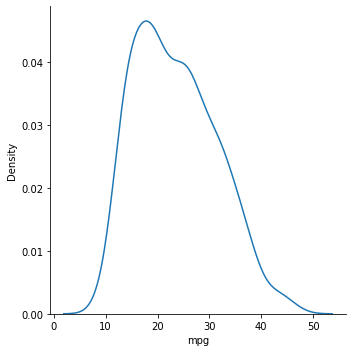

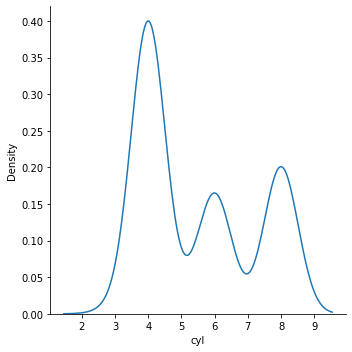

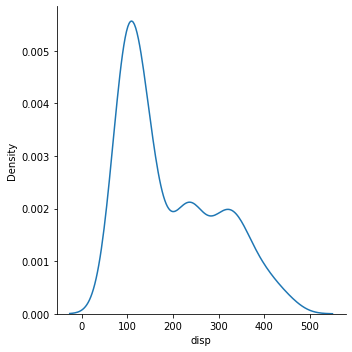

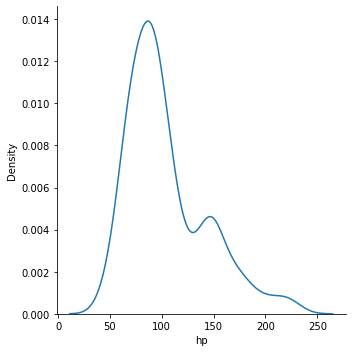

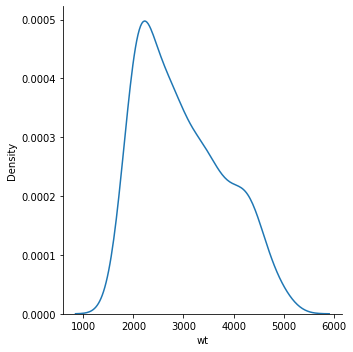

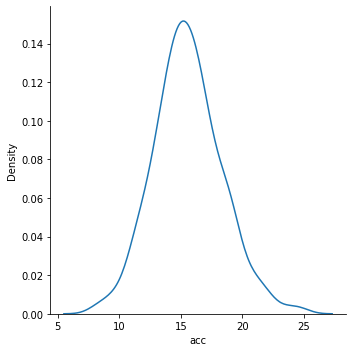

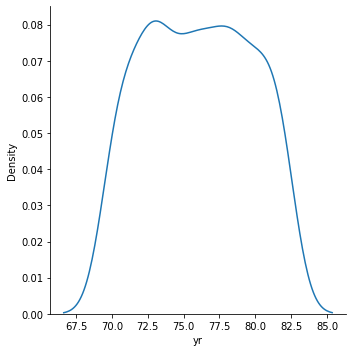

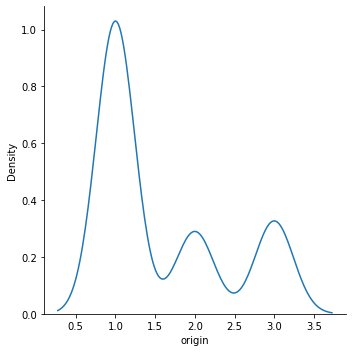

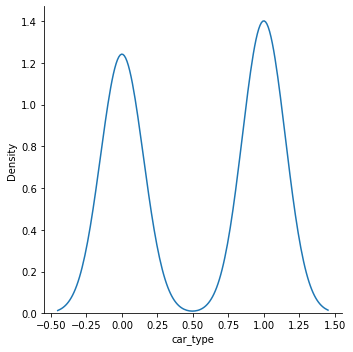

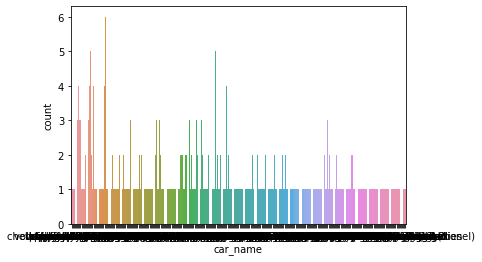

In [15]:
plt.figure(figsize=(10,7))
numerical_columns = car_data._get_numeric_data().columns
categorical_columns = (set(car_data.columns) - set(numerical_columns))
def plot_univariate_graps():
    for col in car_data.columns:
        if col in numerical_columns:
            sns.displot(car_data[col], kind='kde')
        elif col in categorical_columns:
            sns.countplot(car_data[col])
        plt.show()

plot_univariate_graps()
            

In [16]:
stand_scaler = StandardScaler()
for col in numerical_columns:
    car_data[col] = stand_scaler.fit_transform(car_data[[col]])

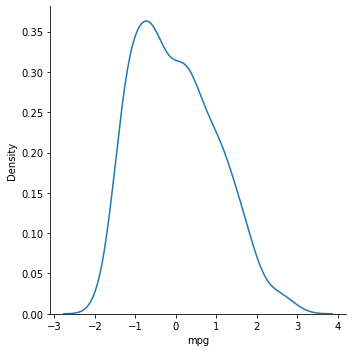

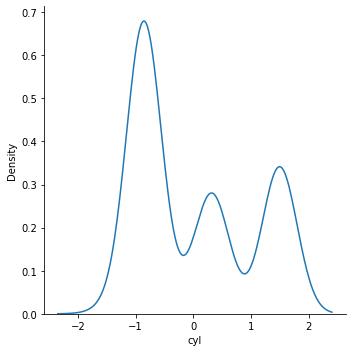

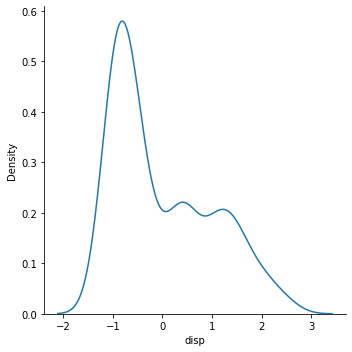

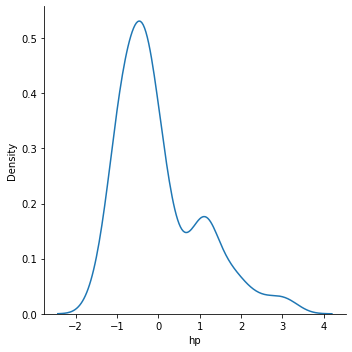

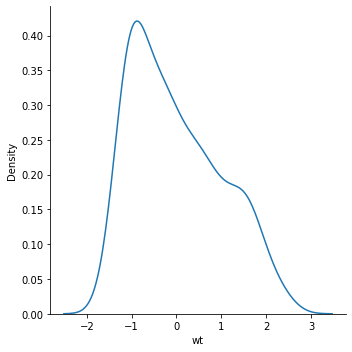

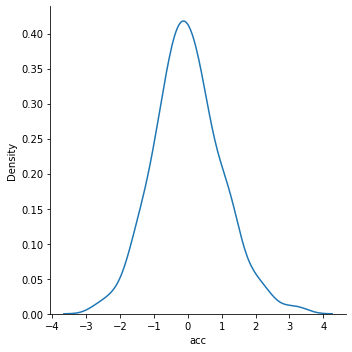

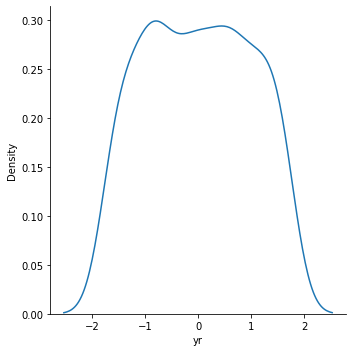

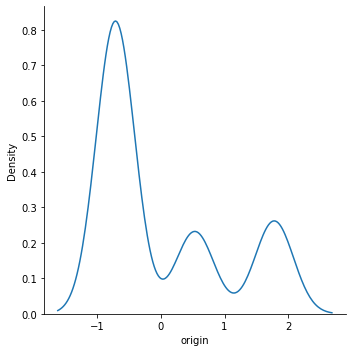

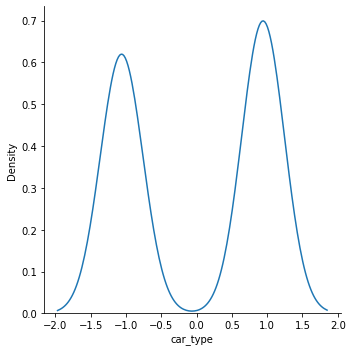

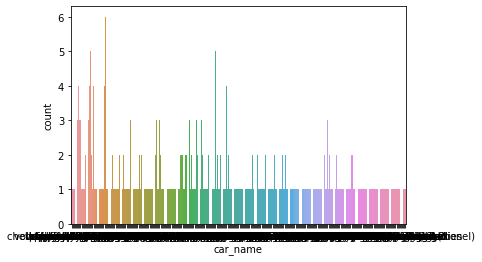

In [17]:
plot_univariate_graps()

# Bi Variate Analysis

<Figure size 1080x648 with 0 Axes>

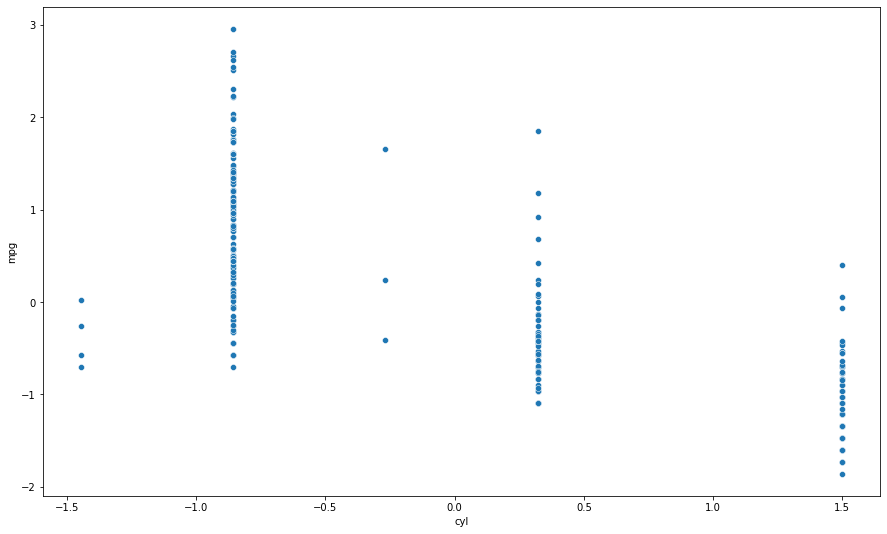

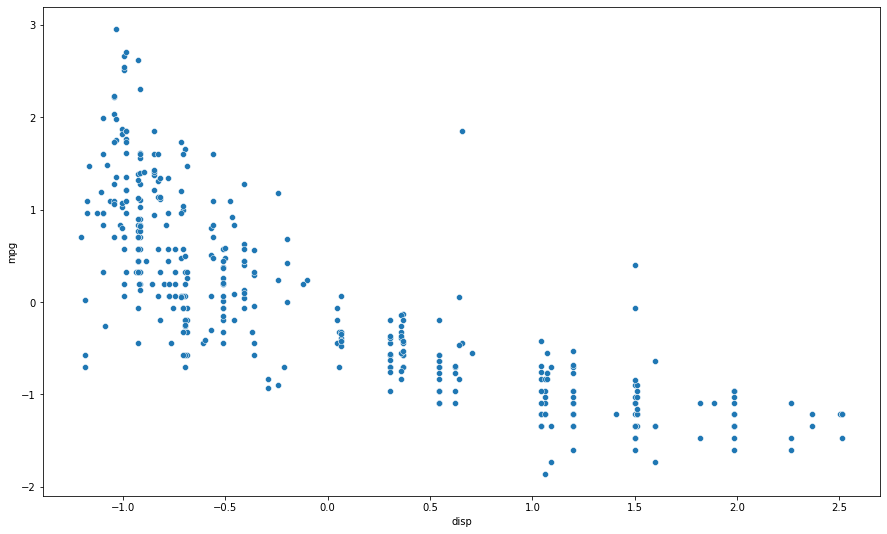

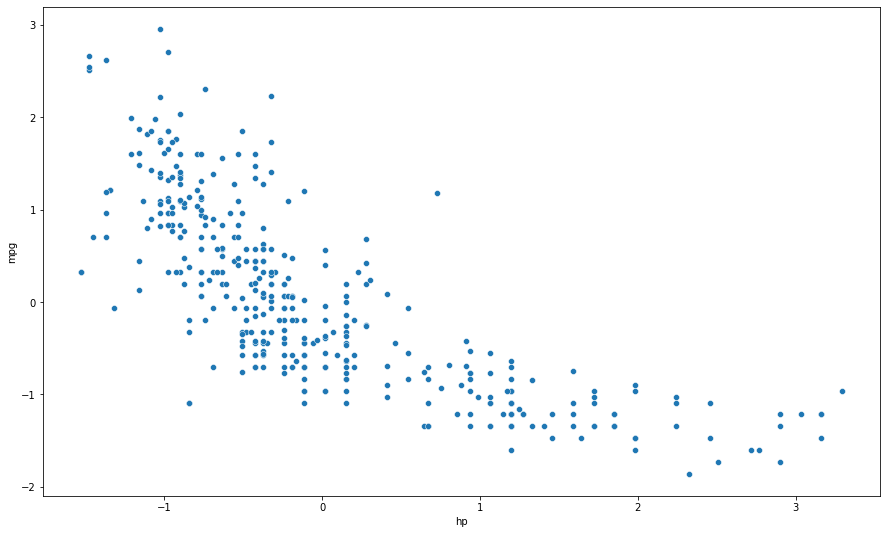

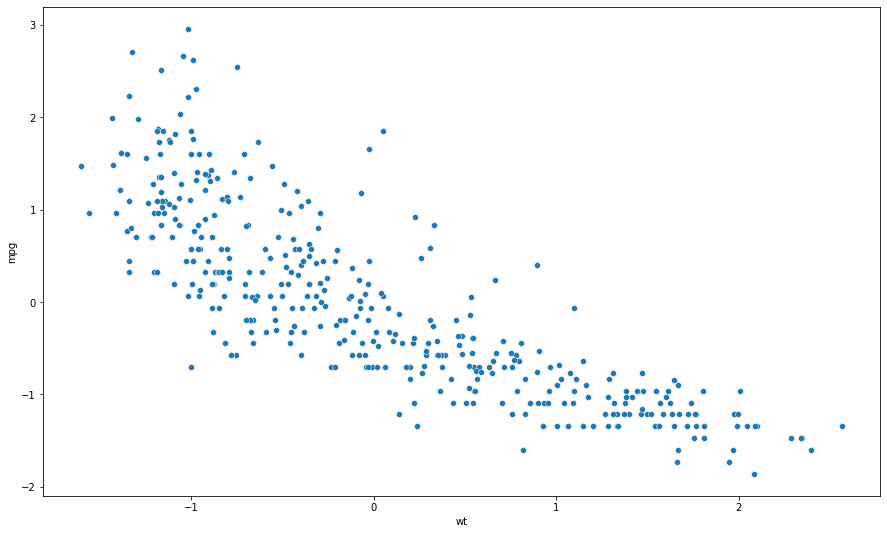

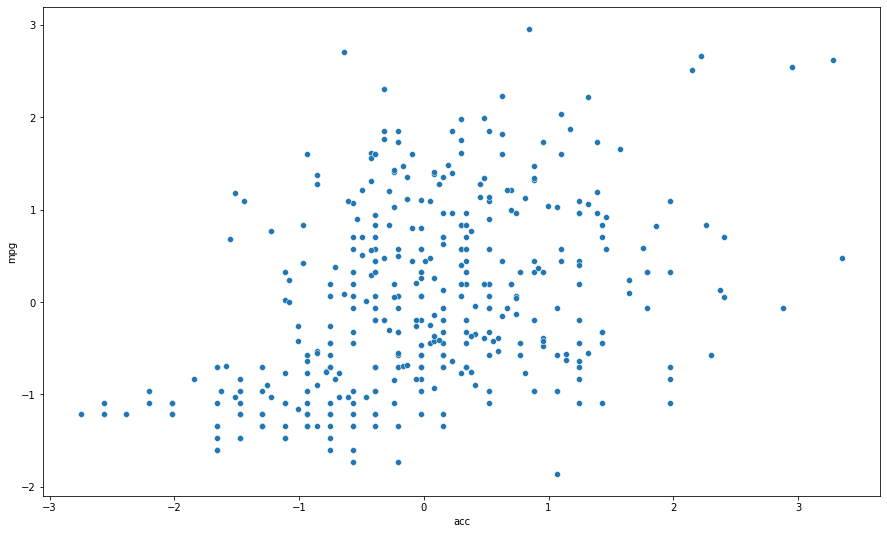

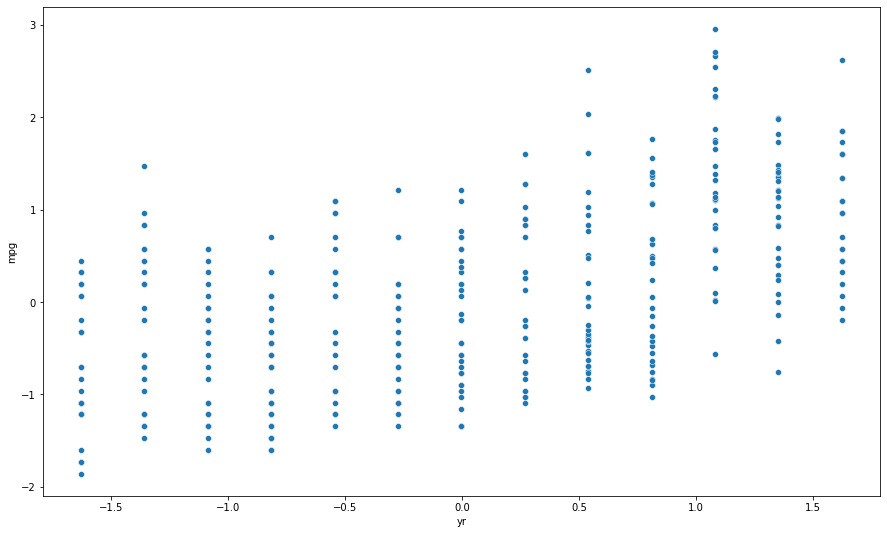

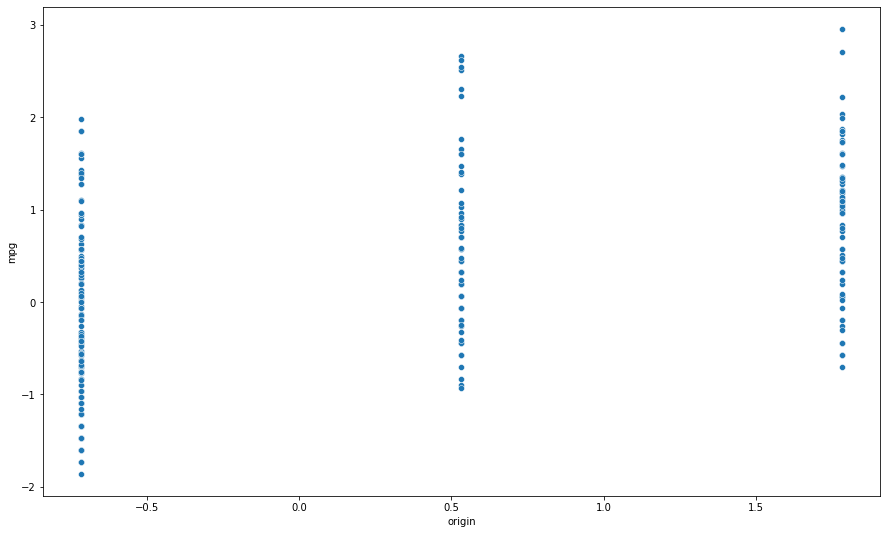

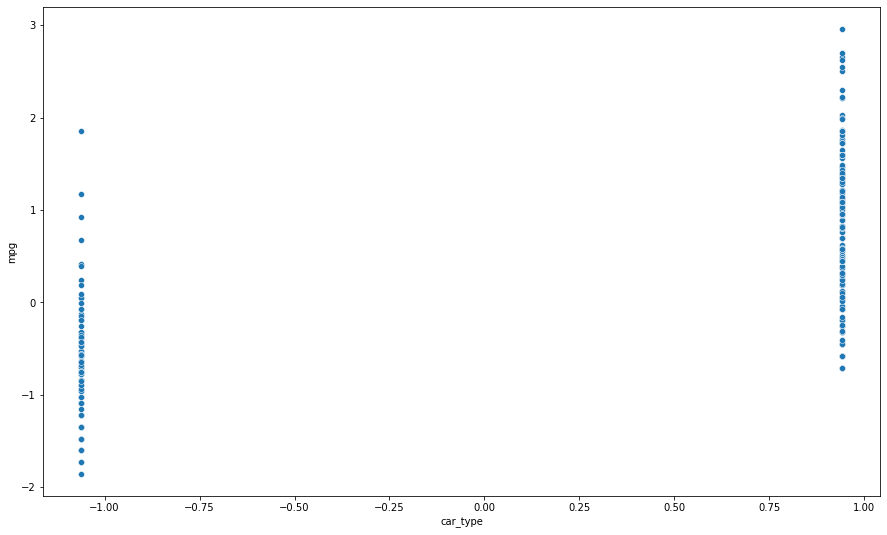

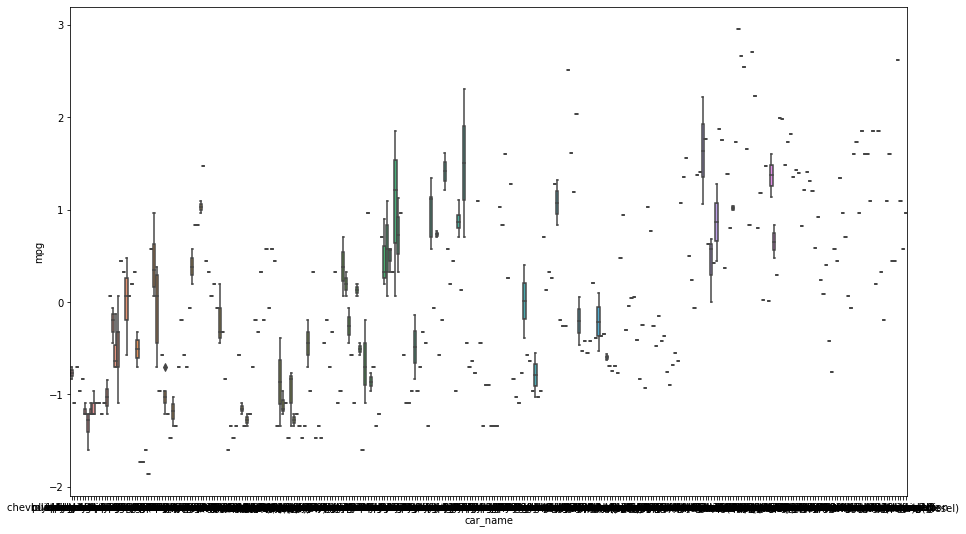

In [18]:
def plot_target_vs_feature():
    
    for col in car_data.columns:
        plt.figure(figsize=(15,9))
        if col =='mpg':
            continue
        elif col in numerical_columns:
            sns.scatterplot(car_data[col], car_data['mpg'])
        elif col in categorical_columns:
            sns.boxplot(car_data[col], car_data['mpg'])
        plt.show()
plot_target_vs_feature()

In [19]:
car_data_cloned = car_data.copy()
car_data_cloned.drop('car_name', axis=1, inplace=True)

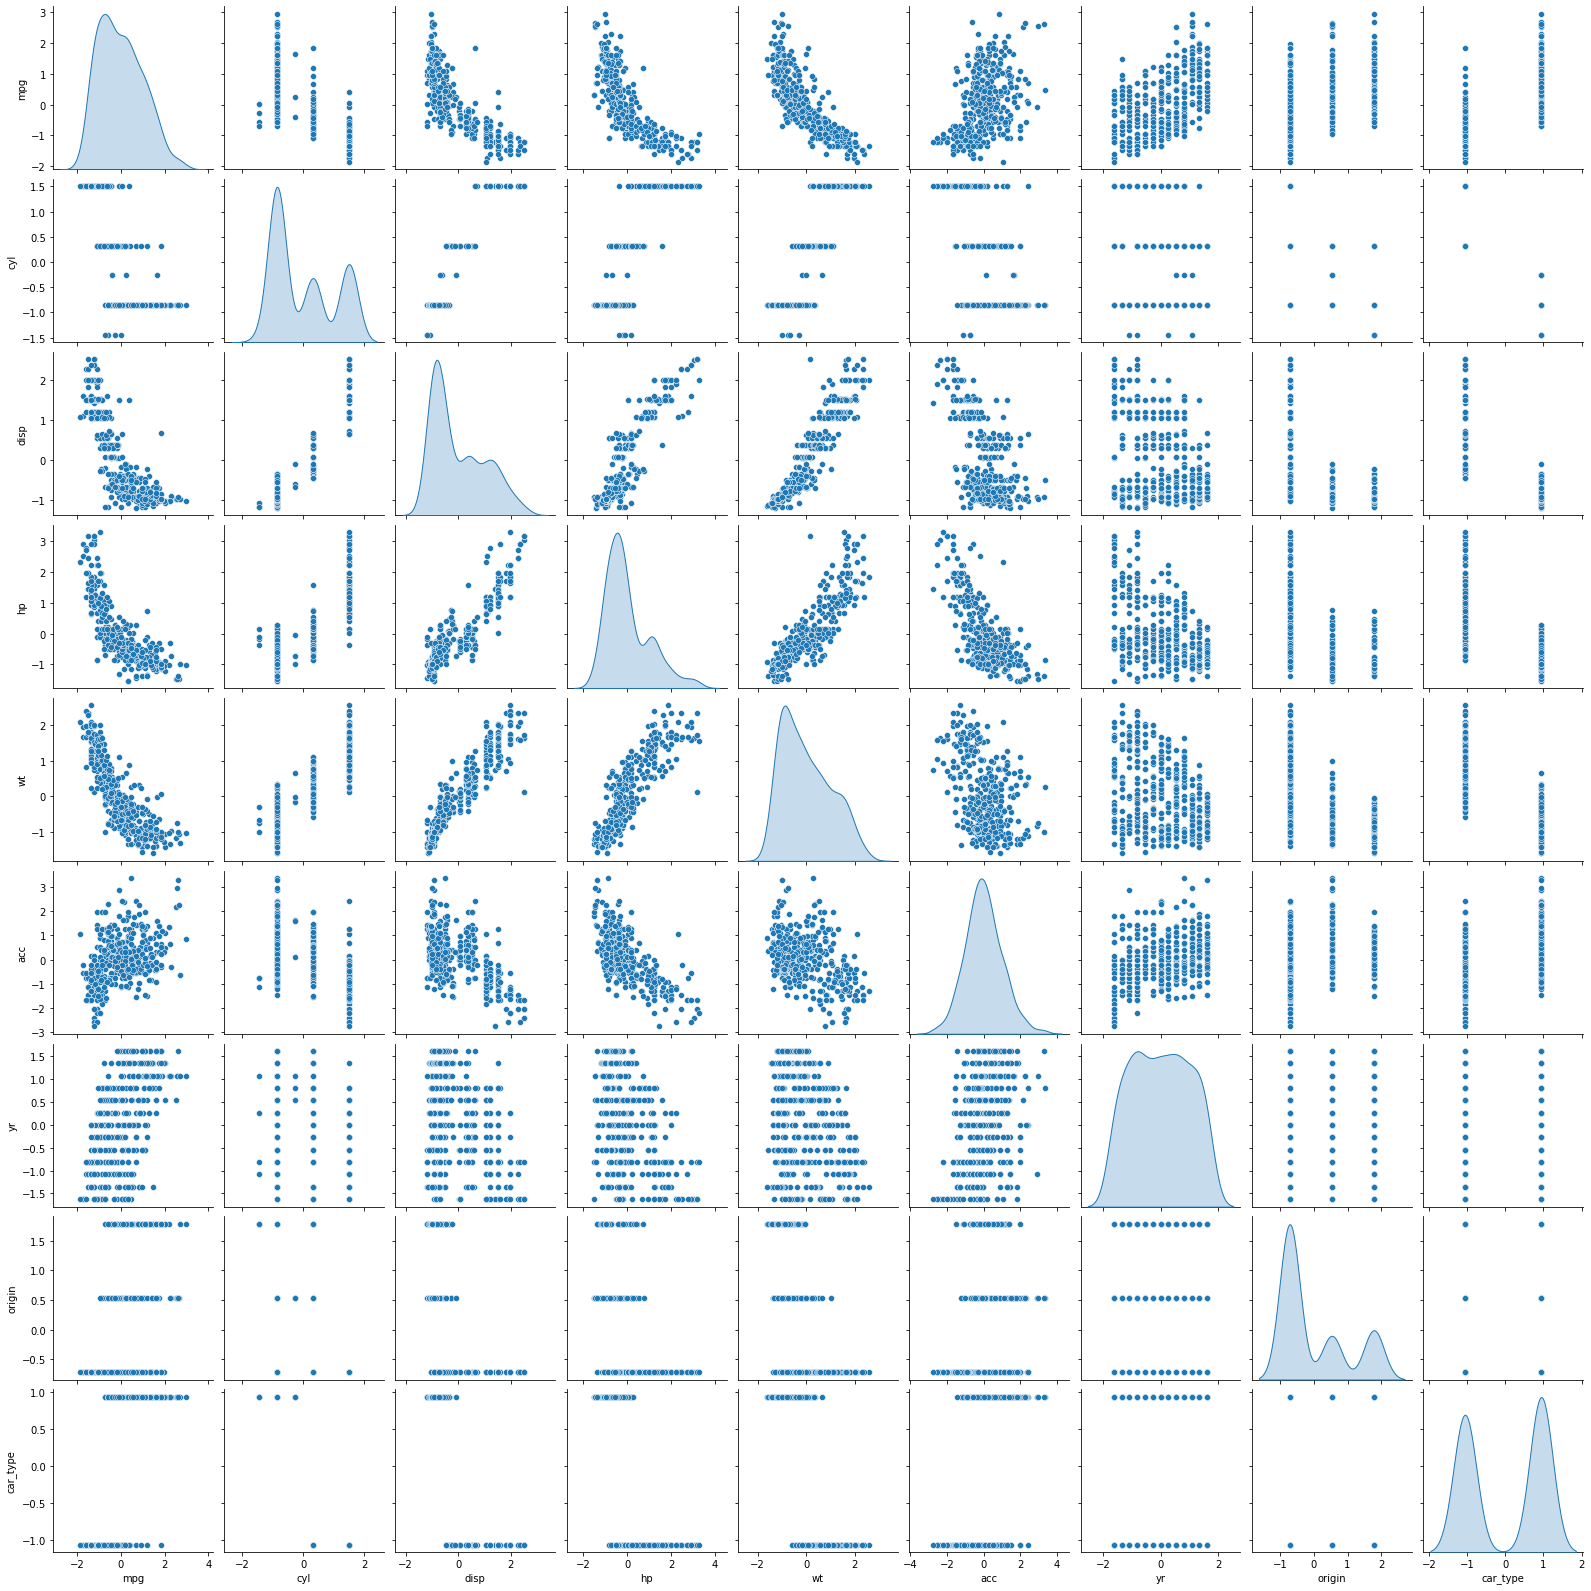

In [20]:
sns.pairplot(car_data_cloned, diag_kind='kde')

# Q3. Split the dataset into training and test sets and fit the model. Also calculate R square

In [21]:
X = car_data_cloned.drop('mpg', axis=1)
y = car_data_cloned['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [22]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

# Q4. Calculate Mean Square Error for both train and test set

In [35]:
print('train R^2:{}'.format(linear_regression.score(X_train, y_train)))
print('test R^2:{}'.format(linear_regression.score(X_test, y_test)))

print('train mean squared error:{}'.format(mean_squared_error(linear_regression.predict(X_train), y_train)))
print('test mean squared error:{}'.format(mean_squared_error(linear_regression.predict(X_test), y_test)))

train R^2:0.8320295771857644
test R^2:0.8535523259759774
train mean squared error:0.17084054128957696
test mean squared error:0.14051350355352135


# Q5. Evaluate the model using cross validation

In [45]:
def do_cross_validation(model):
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    results = cross_val_score(model, X, y, cv=kfold)
    print(results)
    print("score: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
do_cross_validation(linear_regression)

[0.75043972 0.67783863 0.8290147  0.8643082  0.84159334 0.88878032
 0.83754758 0.79961803 0.82861014 0.86430729]
score: 81.821% (5.918%)


# Ensemble Techniques

In [46]:
dTree = DecisionTreeRegressor(max_depth=4, criterion='mse', random_state=7)
bagging = BaggingRegressor(dTree, n_estimators=50, random_state=7)

In [47]:
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4,
                                                      random_state=7),
                 n_estimators=50, random_state=7)

In [48]:
y_predict = bagging.predict(X_test)
y_predict

array([-3.81541364e-01,  4.87275789e-01, -8.50167780e-01, -9.29371658e-02,
       -4.35586111e-01, -1.06591174e+00,  7.90267064e-01,  1.71108106e+00,
       -7.98861611e-01, -1.32763423e+00,  1.00589354e+00, -7.89202255e-01,
       -6.33037718e-01,  4.88575923e-02,  1.67407040e+00, -2.01378825e-01,
       -1.23432954e+00, -5.01878968e-01, -1.39117438e+00,  1.98393193e+00,
       -2.35821320e-02,  7.34682275e-01, -2.91232069e-01,  4.28378095e-01,
        3.45333235e-01,  7.78254786e-01,  1.26309536e+00,  1.74333801e+00,
       -9.69119195e-01,  8.05692984e-01,  2.42505573e-01, -1.28962608e+00,
       -2.47931097e-01,  1.23348031e-01,  3.90530963e-02, -1.17460507e+00,
        2.48937080e-01, -1.39117438e+00,  1.21303581e+00,  1.86320351e-02,
        4.24304482e-01, -2.37902115e-03, -7.15462987e-01,  1.40140012e+00,
        1.35926736e-01, -5.33518964e-01, -6.76423799e-01, -1.19137060e+00,
        4.32558234e-01, -7.10988850e-01,  4.28378095e-01,  3.58088605e-01,
       -1.05736800e+00, -

In [49]:
mean_squared_error(y_predict, y_test)

0.12323170846116265

In [50]:
do_cross_validation(bagging)

[0.70384326 0.53534429 0.8996459  0.91700999 0.84663289 0.9153161
 0.88296834 0.86498265 0.87977748 0.90538075]
score: 83.509% (11.604%)


# Feature Engineering